## Install requirements

In [14]:
!python.exe -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [15]:
%pip install -r requirements-torch-windows.txt -U
%pip install -r requirements.txt -U

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu117
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Init stable diffusion

In [16]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch

def initdiffusionpipeline(model_id):
    # Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    pipe = pipe.to("cuda")
    return pipe

#diffusionpipeline=initdiffusionpipeline("stabilityai/stable-diffusion-2-1")
diffusionpipeline=initdiffusionpipeline("dreamlike-art/dreamlike-diffusion-1.0")

C:\Users\key\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
text_encoder\model.safetensors not found


In [17]:
import re
def saveimage(image, prompt, seed, postfix=""):
    cleanprompt = re.sub("( |,)", '-', prompt)
    fname = f"images/{cleanprompt}-{seed}-{postfix}.png"
    image.save(fname)
    print(fname)
    display(image)
    #image.show() # open outside

In [18]:
def generate(prompt,nbimages=1,seed=42):
    images = []
    for i in range(nbimages):
        generator = torch.Generator("cuda").manual_seed(seed+i)
        image = diffusionpipeline(prompt,num_images_per_prompt=1, generator=generator).images[0]
        saveimage(image, prompt, seed+i)
        images.append(image)
    #images = diffusionpipeline(prompt,num_images_per_prompt=nbimages, generator=generator).images
    return images

In [21]:
def expand(prompt):
    # for each {|} group, loop on each element
    # 1 - parse prompt into parts, each a list of 1 to n elements 
    parts=[]
    partelements=[]
    element=""
    for pos in range(len(prompt)):
        if prompt[pos]=="{" or prompt[pos]=="}"  : # enter a new multi-part
            partelements.append(element) # store latest element in previous part
            parts.append(partelements)# store previous part
            partelements=[]
            element=""
        elif prompt[pos]=="|": # a new element of the multi-part
            partelements.append(element)
            element=""
        else:
            element += prompt[pos]
    partelements.append(element) # store latest element in previous part
    parts.append(partelements)# store previous part
    # 2 - Derive the combinations
    promptlist=[""]
    for part in parts:
        newprompts=[]
        for previousstepprompt in promptlist:
            for partelement in part:
                newprompts.append(previousstepprompt+partelement)
        promptlist=newprompts #ensure its a copy
    return promptlist

## Run

imagine a prehistoric kraken lurking in the deep green blue sea, deep blue shadows and sun rays, undersea jungle, high definition rendering


100%|██████████| 50/50 [00:06<00:00,  8.25it/s]


images/imagine-a-prehistoric-kraken-lurking-in-the-deep-green-blue-sea--deep-blue-shadows-and-sun-rays--undersea-jungle--high-definition-rendering-42-.png


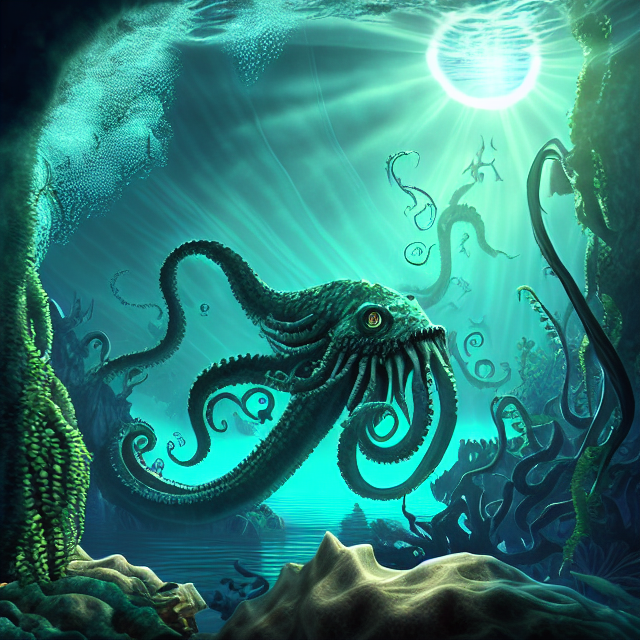

imagine a prehistoric octopus lurking in the deep green blue sea, deep blue shadows and sun rays, undersea jungle, high definition rendering


100%|██████████| 50/50 [00:06<00:00,  8.24it/s]


images/imagine-a-prehistoric-octopus-lurking-in-the-deep-green-blue-sea--deep-blue-shadows-and-sun-rays--undersea-jungle--high-definition-rendering-42-.png


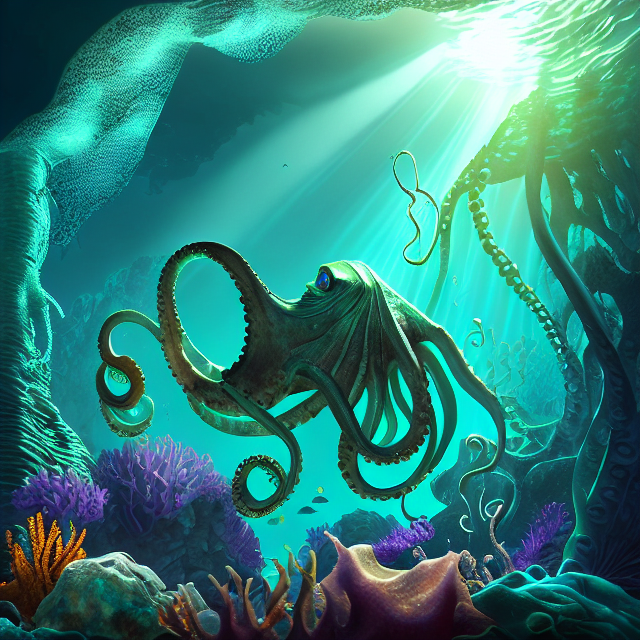

imagine a prehistoric creature lurking in the deep green blue sea, deep blue shadows and sun rays, undersea jungle, high definition rendering


100%|██████████| 50/50 [00:06<00:00,  8.18it/s]


images/imagine-a-prehistoric-creature-lurking-in-the-deep-green-blue-sea--deep-blue-shadows-and-sun-rays--undersea-jungle--high-definition-rendering-42-.png


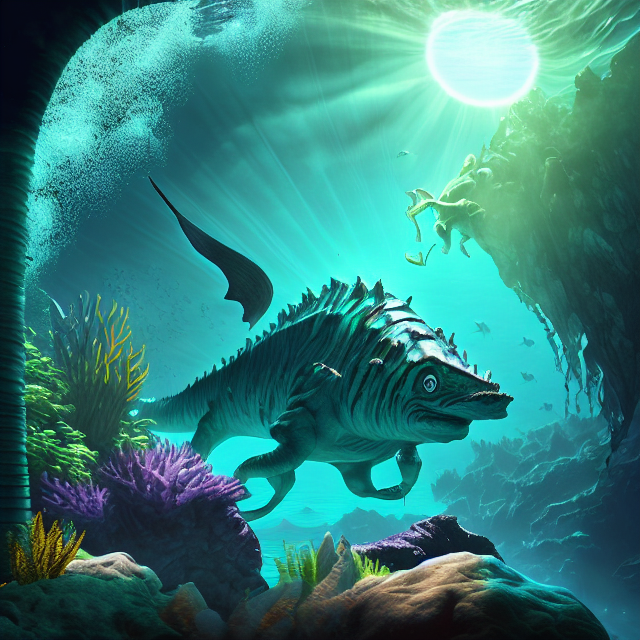

In [23]:
prompt="imagine a prehistoric {kraken|octopus|creature} lurking in the deep green blue sea, deep blue shadows and sun rays, undersea jungle, high definition rendering"
prompts=expand(prompt)
for p in prompts:
    print(p)
    generate(p)
    